## Load images
In this chapter, we'll work with sections of a computed tomography (CT) scan from The Cancer Imaging Archive. CT uses a rotating X-ray tube to create a 3D image of the target area.

The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.

To warm up, use the imageio package to load a single DICOM image from the scan volume and check out a few of its attributes.



In [3]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread('Data/tcia-chest-ct-sample/chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


## Metadata
ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

* Patient demographics: name, age, sex, clinical information
* Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)
Start this exercise by reading in the chest image and listing the available fields in the meta dictionary.

After reading in the image, use im.meta to select the true statement from the list below.



In [5]:
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


## Plot images
Perhaps the most critical principle of image analysis is: look at your images!

Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

* cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.
* vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
* plt.axis('off') removes axis and tick labels from the image.

For this exercise, plot the CT scan and investigate the effect of a few different parameters.

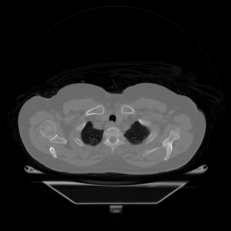

In [54]:
import matplotlib.pyplot as plt

# Draw the image in grayscale
plt.imshow(im, cmap='gray')
plt.axis('off')
# Render the image
plt.show()

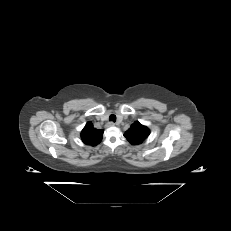

In [53]:
""" Draw the image in grayscale. Also, set vmin=-200 and vmax=200 to increase the contrast 
(i.e., the distance between the brightest and darkest colors is smaller than before).
 """

# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)
plt.axis('off')
# Render the image
plt.show()

## Stack images
Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.


![image](Data/1.Exploration/Stacks4D.png)


In this exercise, we will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: vol[plane, row, col].

Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.



In [16]:
"""
Import imageio and numpy (as np).
Load "chest-220.dcm", "chest-221.dcm", and "chest-222.dcm".
Create a 3D volume using np.stack(). Set the stacking axis to 0.
Print the shape attribute of vol.
 """

 # Import ImageIO and NumPy
import imageio
import numpy as np
file_dir = 'Data/tcia-chest-ct-sample/'


# Read in each 2D image
im1 = imageio.imread(file_dir+'chest-220.dcm')
im2 = imageio.imread(file_dir+'chest-221.dcm')
im3 = imageio.imread(file_dir+'chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3])
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


## Load volumes
ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

For this exercise, read in an entire volume of brain data from the "tcia-chest-ct" folder, which contains 25 DICOM images.


In [23]:
""" 
Use volread() to load the directory, "tcia-chest-ct".
Print the available metadata using the keys() method of vol.meta.
Print the shape of the volume.
"""

# Load the "tcia-chest-ct" directory
vol = imageio.volread('Data/tcia-chest-ct-sample/', 'DICOM')

# Print image attributes
print('\n Available metadata:', vol.meta.keys() )
print('Shape of image array:', vol.shape)


Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)

 Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


## Field of view
The amount of physical space covered by an image is its field of view, which is calculated from two properties:

* Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
* Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).


For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.



## Generate subplots
You can draw multiple images in one figure to explore data quickly. Use plt.subplots() to generate an array of subplots.
```
fig, axes = plt.subplots(nrows=2, ncols=2)
```

![image](Data/1.Exploration/Ch1_L3_Fig.png)

To draw an image on a subplot, call the plotting method directly from the subplot object rather than through PyPlot: axes[0,0].imshow(im) rather than plt.imshow(im).

For this exercise, draw im1 and im2 on separate subplots within the same figure.



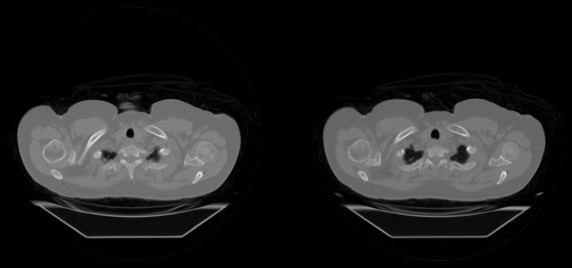

In [52]:
'''
Create a subplots grid where nrows=2 and ncols=1.
Draw im1 and im2 on the first and second subplots respectively. Use a "gray" colormap for each.
For each subplot, turn off the axis ticks and labels.
'''

# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# Draw an image on each subplot
axes[0].imshow(im1, cmap='gray')
axes[0].axis('off')

# Remove ticks/labels and render
axes[1].imshow(im2, cmap='gray')
axes[1].axis('off')
plt.show()

## Slice 3D images
The simplest way to plot 3D and 4D images by slicing them into many 2D frames. Plotting many slices sequentially can create a "fly-through" effect that helps you understand the image as a whole.

![image](Data/1.Exploration/Axial.gif)

To select a 2D frame, pick a frame for the first axis and select all data from the remaining two: vol[0, :, :]

For this exercise, use for loop to plot every 40th slice of vol on a separate subplot. matplotlib.pyplot (as plt) has been imported for you.



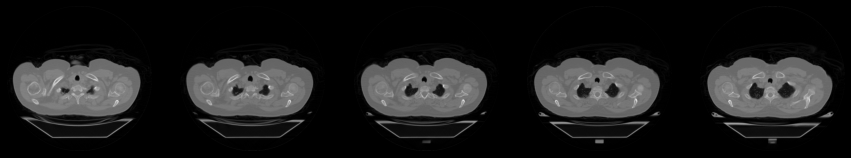

In [51]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows= 1, ncols=5, figsize=(15, 15))

# Loop through subplots and draw image
for ii in range(5):
    im = vol[ii, :, :]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

## Plot other views
Any two dimensions of an array can form an image, and slicing along different axes can provide a useful perspective. However, unequal sampling rates can create distorted images.

![image](Data/1.Exploration/Shape-Sampling.png)

Changing the aspect ratio can address this by increasing the width of one of the dimensions.

For this exercise, plot images that slice along the second and third dimensions of vol. Explicitly set the aspect ratio to generate undistorted images.



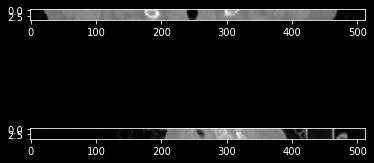

In [62]:
'''
Slice a 2D plane from vol where "axis 1" is 256.
Slice a 2D plane from vol where "axis 2" is 256.
For each image, calculate the aspect ratio by dividing the image "sampling" rate for axis 0 by its opponent axis. This information is in vol.meta.
Plot the images in a subplots array. Specify the aspect ratio for each image, and set cmap='gray'.
'''

# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()